In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
#1、series类型
#2、DataFrame数据表
#3、index索引

In [3]:
#series入门
#创建series
ser1 = pd.Series(np.random.randint(100, 500, 4), index = [f'{x}季度' for x in '一二三四'])

In [4]:
ser1

一季度    270
二季度    148
三季度    168
四季度    319
dtype: int32

In [5]:
ser2 = pd.Series(data={
    '一季度': 520,
    '二季度': 430,
    '三季度':660,
    '四季度':100
})

In [6]:
ser2

一季度    520
二季度    430
三季度    660
四季度    100
dtype: int64

In [7]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
# #安装字体
# plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBackend.figure_format = 'svg'

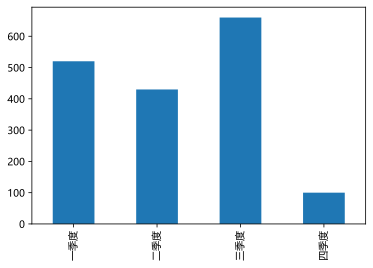

In [8]:
ser2.plot(kind='bar')

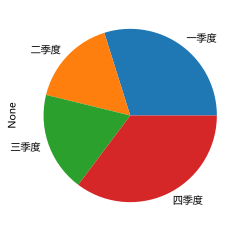

In [9]:
ser1.plot(kind='pie')

In [10]:
#求描述性统计信息
ser2.max()

660

In [11]:
#中位数
ser2.median()

475.0

In [12]:
ser2.describe()

count      4.000000
mean     427.500000
std      237.960081
min      100.000000
25%      347.500000
50%      475.000000
75%      555.000000
max      660.000000
dtype: float64

In [13]:
#对数据的观察
#查看数据索引
ser2.index

Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')

In [14]:
ser2.values

array([520, 430, 660, 100], dtype=int64)

In [15]:
ser2.size

4

In [16]:
#查看数据是否有空值
ser2.hasnans

False

In [17]:
#series的索引
#数据切片
ser2

一季度    520
二季度    430
三季度    660
四季度    100
dtype: int64

In [18]:
#下标切片
ser2[1:3]

二季度    430
三季度    660
dtype: int64

In [19]:
ser2['二季度': '三季度']

二季度    430
三季度    660
dtype: int64

In [20]:
ser2>400

一季度     True
二季度     True
三季度     True
四季度    False
dtype: bool

In [21]:
ser2[ser2>400]

一季度    520
二季度    430
三季度    660
dtype: int64

In [22]:
#空值的处理
ser2 = pd.Series(data={
    '一季度': 520,
    '二季度': 430,
    '三季度':np.NAN,
    '四季度':100
})

In [23]:
#1、删除
    #1、数据是否有意义
    #2、空值的量级
#2、填充

In [24]:
ser2.hasnans

True

In [25]:
#删除
ser2.dropna(inplace = True)

In [26]:
#1、根据统计学依据填充
#2、根据业务逻辑填充

In [27]:
#连续的数据
ser2.fillna(method='ffill')

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [28]:
ser2

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [29]:
ser2.fillna(method='bfill')

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [30]:
#使用描述性统计信息填充
#平均值填充
ser2.fillna(ser2.mean())

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [31]:
#中位数填充
ser2.fillna(ser2.median())

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [32]:
#直接填充
ser2.fillna(200)

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [33]:
ser2

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

In [34]:
ser2.isnull()

一季度    False
二季度    False
四季度    False
dtype: bool

In [35]:
ser2.notnull()

一季度    True
二季度    True
四季度    True
dtype: bool

In [36]:
# 创建DataFrame
# 使用字典的方式来创建
data_dict = {
    '语文': [43, 56, 76, 80, 90],
    '数学': [99, 56, 65, 33, 44],
    '英语': [45, 57, 67, 87, 98]
}


In [37]:
students_id = np.arange(1001, 1006)

In [38]:
df1 = pd.DataFrame(data = data_dict, index = students_id)

In [39]:
df1

,语文,数学,英语
1001,43,99,45
1002,56,56,57
1003,76,65,67
1004,80,33,87
1005,90,44,98


In [40]:
# 读取csv文件

In [41]:
# !pip install pandas_datareader

In [42]:
import pandas_datareader as pdr
import pandas_datareader.data as web

In [43]:
df2 = web.DataReader('BABA', 'stooq')

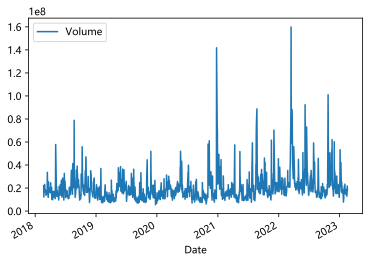

In [44]:
df2.plot(kind='line', y='Volume')

In [45]:
#基础方法
#观察数据情况
#头部数据
df2.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17,101.00,101.09,99.25,100.01,18121644
2023-02-16,102.71,104.52,102.03,103.11,21747094
2023-02-15,102.39,103.44,102.00,103.08,18910236
2023-02-14,103.55,104.48,101.85,104.22,12978395
2023-02-13,105.99,106.35,104.15,104.79,17577825
2023-02-10,105.80,106.64,102.79,103.65,18776035
2023-02-09,108.50,109.81,107.75,108.46,16281295
2023-02-08,107.10,107.14,103.55,105.11,14329488
2023-02-07,106.84,107.35,103.72,105.50,16861658


In [46]:
#尾部数据
df2.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-06,185.19,188.010,184.82,187.37,17856088
2018-03-05,179.41,181.950,177.07,181.60,15656661
2018-03-02,178.01,180.230,175.45,179.76,18909073
2018-03-01,186.18,187.480,180.05,181.99,17286309
2018-02-28,187.25,188.240,185.00,186.14,19367576
2018-02-27,192.59,193.567,187.21,188.26,23218450
2018-02-26,194.46,195.150,190.65,194.19,19444679
2018-02-23,190.18,193.400,189.95,193.29,16926868
2018-02-22,190.20,190.740,187.77,188.75,12269486


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2023-02-17 to 2018-02-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [48]:
#描述性统计信息
df2.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.00000,1258.000000,1258.000000,1.258000e+03
mean,175.408710,177.65542,172.785443,175.244873,2.037399e+07
std,55.516492,55.73782,55.066092,55.463803,1.271230e+07
min,63.200000,64.10000,58.010000,63.150000,5.522987e+06
25%,135.282500,137.75050,131.747500,136.377500,1.336066e+07
50%,177.525000,179.23000,175.283000,177.185000,1.749594e+07
75%,211.242500,213.72250,209.369975,211.490000,2.306085e+07
max,313.500000,319.32000,308.910000,317.140000,1.598343e+08


In [59]:
# df = pd.read_csv('./2018年北京积分落户数据.csv', index_col = 'id', usecols = ['id', 'name', 'score'], nrows=100)
df = pd.read_csv('./2018年北京积分落户数据.csv', index_col = 'id')

In [50]:
df

,name,birthday,company,score
id,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
...,...,...,...,...
6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75


In [51]:
# 删除行
# df.drop(index=3)
df.drop(index=3, inplace=True)

In [52]:
#删除列
df.drop(columns='company')

,name,birthday,score
id,,,
1,杨效丰,1972-12,122.59
2,纪丰伟,1974-12,121.25
4,杨静,1975-07,118.21
5,张凯江,1974-11,117.79
6,罗恒,1974-01,117.34
...,...,...,...
6015,孙宏波,1978-08,90.75
6016,刘丽香,1976-11,90.75
6017,周崧,1977-10,90.75


In [53]:
# 增加列
df['绩优股'] = '是'

In [54]:
df

,name,birthday,company,score,绩优股
id,,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59,是
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25,是
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21,是
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79,是
6,罗恒,1974-01,艾美仕市场调研咨询（上海）有限公司北京分公司,117.34,是
...,...,...,...,...,...
6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75,是
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75,是
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75,是


In [55]:
#增加行
df.loc[6020] = {'name': 'giao', 'birthday': '1978-1-1', 'company': 'CDU', 'score': 1, '绩优股': '是'}

In [56]:
df

,name,birthday,company,score,绩优股
id,,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59,是
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25,是
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21,是
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79,是
6,罗恒,1974-01,艾美仕市场调研咨询（上海）有限公司北京分公司,117.34,是
...,...,...,...,...,...
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75,是
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75,是
6018,赵妍,1979-07,澳科利耳医疗器械（北京）有限公司,90.75,是


In [57]:
#随机抽样
df.sample(10)

,name,birthday,company,score,绩优股
id,,,,,
5407,牟兆雨,1974-07,翰林汇信息产业股份有限公司,91.34,是
1018,魏君,1975-10,北京和利时自动化驱动技术有限公司,99.58,是
5667,宋子才,1976-07,北京顶点时代软件技术有限公司,91.08,是
4713,张瀚臣,1982-06,北京华为数字技术有限公司,92.12,是
4159,霍万魁,1975-07,大华会计师事务所（特殊普通合伙）,92.75,是
1320,周新会,1974-03,广联达科技股份有限公司,98.34,是
4693,宋吉江,1973-04,国际商业机器（中国）有限公司北京分公司,92.13,是
4213,刘海龙,1976-01,北京索爱普天移动通信有限公司,92.67,是
1545,姚毅,1976-05,中国证劵登记结算有限责任公司北京数据技术分公司,97.62,是
